## Applicazione del metodo del perceptron per la separazione lineare

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256)))

normalizzazione dei valori delle features a media 0 e varianza 1

In [3]:
def normalizza(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    return (X-mu)/sigma

produce e restituisce una serie di statistiche

In [4]:
def statistics(theta,X,t):
    # applica il modello
    y = np.dot(X,theta)
    # attribuisce i punti alle due classi
    y = np.where(y>0, 1, 0)
    # costruisce la confusion matrix
    confmat = np.zeros((2, 2))
    for i in range(2):
        for j in range(2):
            confmat[i,j] = np.sum(np.where(y==i,1,0)*np.where(t==j,1,0))
    return confmat

legge i dati in dataframe pandas

In [5]:
data = pd.read_csv("../dataset/ex2data1.txt", header=0, delimiter=',', names=['x1','x2','t'])

# calcola dimensione dei dati
n = len(data)

# calcola dimensionalità delle features
nfeatures = len(data.columns)-1

X = np.array(data[['x1','x2']])
t = np.array(data['t']).reshape(-1,1)

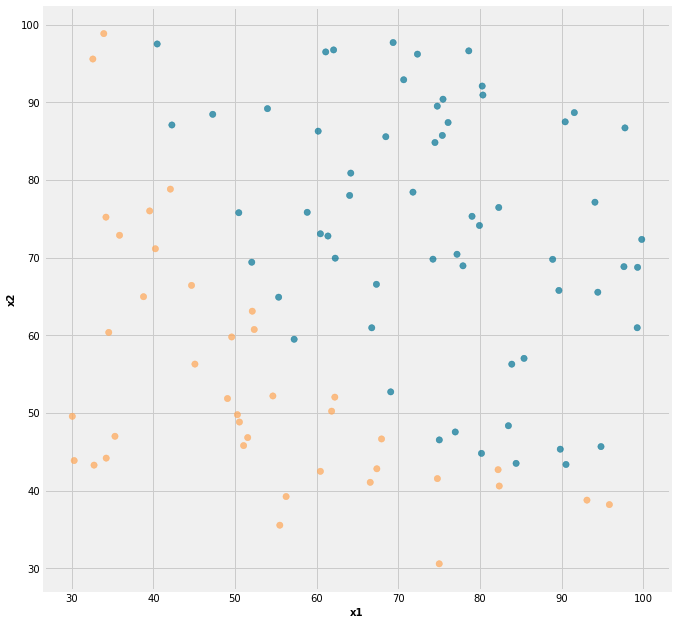

In [6]:
c=[colors[i] for i in np.nditer(t)]
deltax = max(X[:,0])-min(X[:,0])
deltay = max(X[:,1])-min(X[:,1])
minx = min(X[:,0])-deltax/10.0
maxx = max(X[:,0])+deltax/10.0
miny = min(X[:,1])-deltay/10.0
maxy = max(X[:,1])+deltay/10.0
fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('white')
ax = fig.gca()
ax.scatter(X[:,0],X[:,1],s=40,c=c, marker='o', alpha=.7)
t1 = np.arange(minx, maxx,0.01)
plt.xlabel('x1', fontsize=10)
plt.ylabel('x2', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [7]:
X=normalizza(X)

aggiunge una colonna di valori -1 alla matrice delle features

In [8]:
X= np.column_stack((-np.ones(n), X))

In [9]:
# fissa il valore del parametro eta
eta = 0.25

# fissa una valore iniziale casuale per i coefficienti
theta = np.random.rand(nfeatures+1, 1) * 0.1 - 0.05

In [10]:
deltax = max(X[:,1])-min(X[:,1])
deltay = max(X[:,2])-min(X[:,2])
minx = min(X[:,1])-deltax/10.0
maxx = max(X[:,1])+deltax/10.0
miny = min(X[:,2])-deltay/10.0
maxy = max(X[:,2])+deltay/10.0
t1 = np.arange(minx, maxx, 0.01)

In [11]:
thetas = []
thetas.append(theta.copy())
for k in range(2*n+1):
    # determina la classificazione effettuata applicando la soglia 0-1 ai valori forniti 
    # dalla combinazione lineare delle features e dei coefficienti
    y = np.where(np.dot(X, theta)>0,1,0)
    # somma o sottrae eta da tutti i coefficienti per ogni osservazione mal classificata
    theta += eta * np.dot(X.T, t-y)
    thetas.append(theta.copy())

In [ ]:
thetas

In [37]:
k=26
theta = thetas[k]
cf=statistics(theta,X,t)
accuracy=np.trace(cf)/n

In [38]:
cf

array([[30.,  4.],
       [ 9., 56.]])

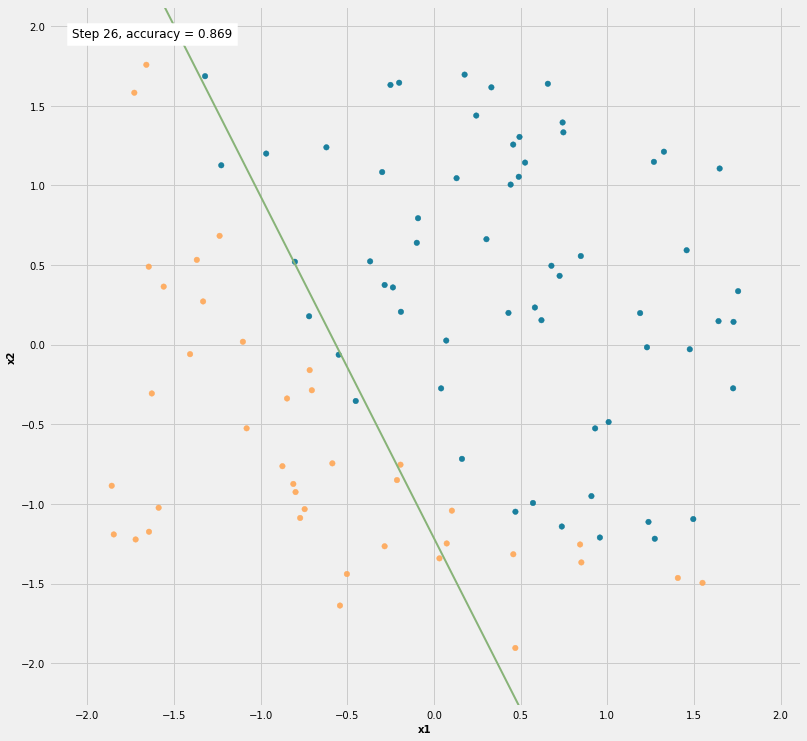

array([[30.,  4.],
       [ 9., 56.]])

In [39]:

theta1=-theta[1]/theta[2] 
theta0=theta[0]/theta[2] 
t2 = theta0+theta1*t1

plt.figure(figsize=(12,12))
plt.scatter(X[:,1],X[:,2],s=30,c=c, marker='o', alpha=.9)
plt.plot(t1, theta0+theta1*t1, color=colors[3], linewidth=2, alpha=1)
plt.xlabel('x1', fontsize=10)
plt.ylabel('x2', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(minx,maxx)
plt.ylim(miny,maxy)
plt.annotate('Step {0:d}, accuracy = {1:3.3f}'.format(k,accuracy), xy=(.03, .97), backgroundcolor='w', va='top', 
xycoords='axes fraction', fontsize=12)
plt.show()

In [43]:
accuracies = np.array([np.trace(statistics(theta,X,t))/n for theta in thetas])

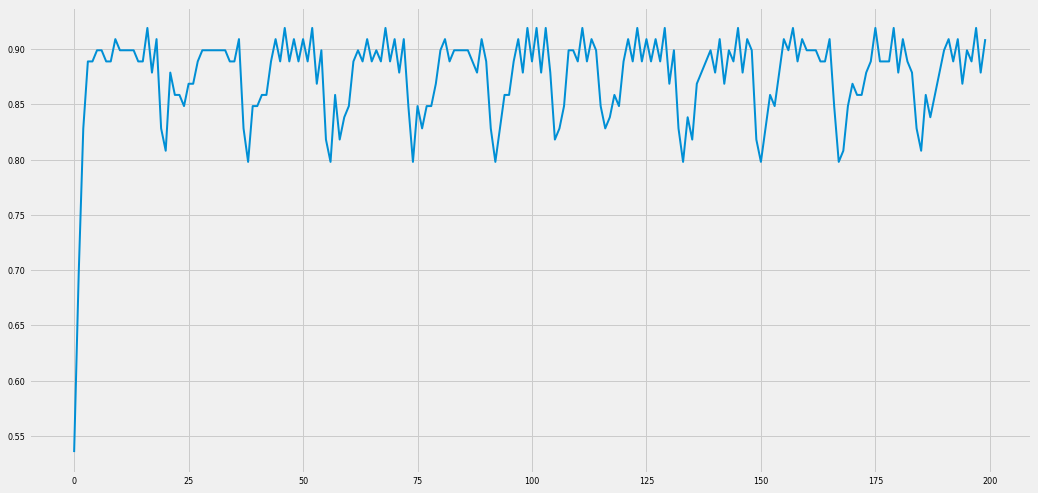

In [45]:
plt.plot(accuracies)